# Exploratory Data Analysis

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Loading

In [2]:
df = pd.read_csv('../data/HAM10000_metadata.csv')
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [3]:
rgb_df = pd.read_csv('../data/hmnist_28_28_RGB.csv')
rgb_df.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

# Missing Values

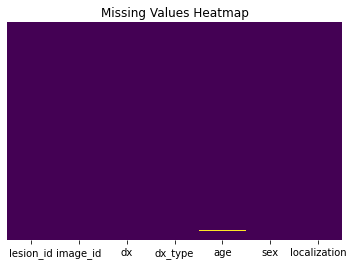

In [4]:
ax = sns.heatmap(df.isna(), yticklabels=False, cbar=False, cmap='viridis')
fig = ax.get_figure()
plt.title('Missing Values Heatmap')
fig.savefig('../plots/missing_values_heatmap.png')

# Data Visualization

Age Distribution by Gender

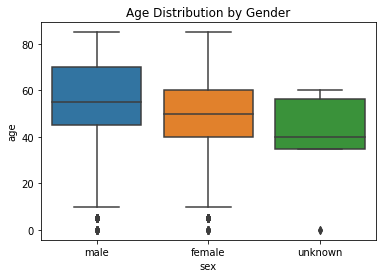

In [5]:
ax = sns.boxplot(x='sex', y='age', data=df)
fig = ax.get_figure()    
plt.title('Age Distribution by Gender')
fig.savefig('../plots/age_distribution_by_gender.png')

Cases by Diagnostic Category

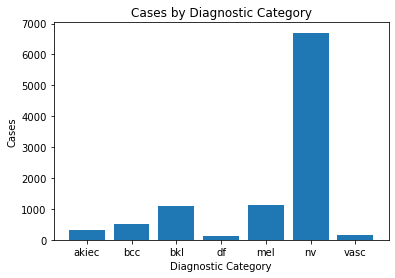

In [6]:
count_by_category = df.groupby(['dx']).size().reset_index(name='count')

fig = plt.figure()
plt.bar(count_by_category['dx'], count_by_category['count'], align='center')
plt.title('Cases by Diagnostic Category')
plt.xlabel('Diagnostic Category')
plt.ylabel('Cases')
fig.savefig('../plots/cases_by_diagnostic_category.png')

Cases by Localization

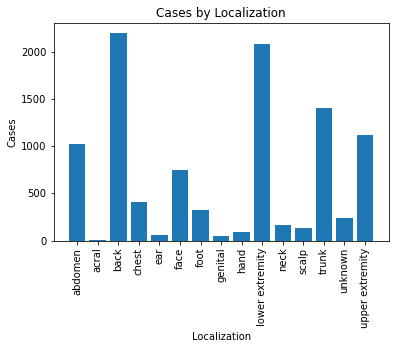

In [7]:
count_by_localization = df.groupby(['localization']).size().reset_index(name='count')

fig = plt.figure()
plt.bar(count_by_localization['localization'], count_by_localization['count'], align='center')
plt.title('Cases by Localization')
plt.xlabel('Localization')
plt.xticks(rotation='vertical')
plt.ylabel('Cases')
fig.savefig('../plots/cases_by_localization.png')

Cases by Diagnostic Category and Confirmation Type

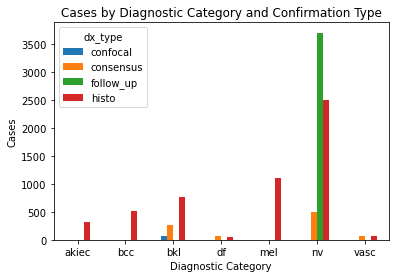

In [8]:
count_by_dx_dxtype = df.groupby(['dx','dx_type']).size().reset_index(name='count')
count_by_dx_dxtype = count_by_dx_dxtype.pivot_table(values='count', index='dx', columns='dx_type')

barplot = count_by_dx_dxtype.plot.bar()
fig = barplot.get_figure()
plt.title('Cases by Diagnostic Category and Confirmation Type')
plt.xlabel('Diagnostic Category')
plt.xticks(rotation='horizontal')
plt.ylabel('Cases')
fig.savefig("../plots/cases_by_diagnostic_category_and_confirmation_type.png")

Cases by Age Group and Gender

In [9]:
df['age'].unique()

array([80., 75., 60., 70., 55., 85., 65., 40., 50., 45., 35.,  0., 30.,
       nan,  5., 25., 20., 10., 15.])

In [10]:
bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89]
labels = ["0-9", "10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"]
df['age_bin'] = pd.cut(x=df['age'], bins=bins, labels=labels, right=False)
df.head()

lesion_id      image_id   dx dx_type   age   sex localization age_bin
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   80-89
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   80-89
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   80-89
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   80-89
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   70-79

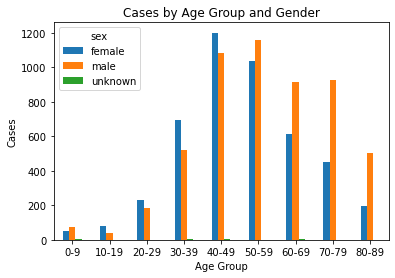

In [11]:
count_by_age_sex = df.groupby(['age_bin','sex']).size().reset_index(name='count')
count_by_age_sex = count_by_age_sex.pivot_table(values='count', index='age_bin', columns='sex')
barplot = count_by_age_sex.plot.bar()
fig = barplot.get_figure()
plt.title('Cases by Age Group and Gender')
plt.xlabel('Age Group')
plt.xticks(rotation='horizontal')
plt.ylabel('Cases')
fig.savefig("../plots/cases_by_age_group_and_gender.png")

Cases by Age Group and Diagnostic Category

In [12]:
diagnostic_categories = df['dx'].unique()
diagnostic_categories

array(['bkl', 'nv', 'df', 'mel', 'vasc', 'bcc', 'akiec'], dtype=object)

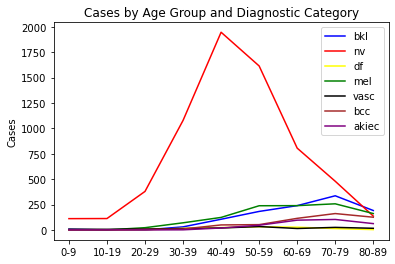

In [13]:
count_by_age_dx = df.groupby(['age_bin','dx']).size().reset_index(name='count')
colors = ['blue', 'red', 'yellow', 'green', 'black', 'brown', 'purple']

for i in range(len(diagnostic_categories)):
    plt.plot('age_bin', 'count', data=count_by_age_dx[count_by_age_dx['dx']==diagnostic_categories[i]], c=colors[i])

plt.title('Cases by Age Group and Diagnostic Category')
plt.ylabel('Cases')
plt.legend(diagnostic_categories)
fig.savefig("../plots/cases_by_age_group_and_diagnostic_category.png")

Scatter Matrix

In [14]:
rgb_df = pd.read_csv('../data/hmnist_28_28_RGB.csv')
rgb_df.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        192        153        193        195        155        192   
1         25         14         30         68         48         75   
2        192        138        153        200        145        163   
3         38         19         30         95         59         72   
4        158        113        139        194        144        174   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        197        154        185        202  ...        173        124   
1        123         93        126        158  ...         60         39   
2        201        142        160        206  ...        167        129   
3        143        103        119        171  ...         44         26   
4        215        162        191        225  ...        209        166   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        138        183        147        166        185        154   
1         55         25         14         28         25         14   
2        143        159        124        142        136        104   
3         36         25         12         17         25         12   
4        185        172        135        149        109         78   

   pixel2351  label  
0        177      2  
1         27      2  
2        117      2  
3         15      2  
4         92      2  

[5 rows x 2353 columns]

In [15]:
# Reference https://www.kaggle.com/raniaioan/starter-skin-cancer-mnist-ham10000-6a5a3b01-0
def plotScatterMatrix(df, plotSize, textSize, filePath):
    # keep only numerical columns
    df = df.select_dtypes(include =[np.number]) 
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    # keep columns where there are more than 1 unique values
    df = df[[col for col in df if df[col].nunique() > 1]] 
    columnNames = list(df)
    # reduce the number of columns for matrix inversion of kernel density plots
    if len(columnNames) > 10: 
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.savefig(filePath)
    plt.show()

In [ ]:
plotScatterMatrix(rgb_df, 20, 10, "../plots/scatter_matrix.jpg")